In [1]:
# Import necessary libraries
import psycopg2
import pandas as pd
import seaborn as sns

In [2]:
# Establishing a connection to the PostgreSQL database using psycopg2
con = psycopg2.connect(database='gun_data_2006-2020',
                       user='postgres',
                       password='Quinnava2054406',
                       host='127.0.0.1', port='5432')

# Creating a cursor to interact with the database
cur = con.cursor()

# Displaying a message to indicate successful database connection
print('Database connected successfully')

Database connected successfully


In [3]:
def query_execute(query):
    """
    Executes the given SQL query on the database and returns the result as a list of rows.

    Parameters:
    - query (str): The SQL query to be executed.

    Returns:
    list: A list containing the result rows of the executed query.
    """
    result_list = []
    
    # Execute the provided query
    cur.execute(query)
    
    # Fetch all rows from the executed query
    rows = cur.fetchall()
    
    # Append each row to the result list
    for row in rows:
        result_list.append(row)
    
    return result_list

In [4]:
# Listing column names for quick reference
query_execute("SELECT column_name\
               FROM information_schema.columns\
               WHERE table_name = 'gun_data'")

[('inci_month',),
 ('victim_age',),
 ('inci_year',),
 ('police',),
 ('id',),
 ('victim_education',),
 ('intent',),
 ('victim_sex',),
 ('victim_race',),
 ('place',)]

In [5]:
# Displaying the count of each type of intent
query_execute("SELECT intent, COUNT(intent)\
               FROM gun_data\
               GROUP BY intent")

[('Accidental', 8186),
 ('Homicide', 201468),
 ('Suicide', 315225),
 ('Undetermined', 4327),
 (None, 0)]

In [6]:
query_execute("SELECT victim_age, COUNT(victim_age)\
               FROM gun_data\
               GROUP BY victim_age\
               ORDER BY COUNT(victim_age) DESC LIMIT 10")

[(22.0, 13673),
 (21.0, 13536),
 (23.0, 13479),
 (24.0, 13019),
 (25.0, 12772),
 (26.0, 12147),
 (20.0, 12074),
 (19.0, 12006),
 (27.0, 11770),
 (28.0, 11261)]

In [7]:
query_execute("SELECT intent, COUNT(intent), inci_year\
               FROM gun_data\
               WHERE intent = 'Homicide' OR intent = 'Suicide'\
               GROUP BY intent, inci_year\
               LIMIT 10")

[('Homicide', 13151, 2006),
 ('Homicide', 12983, 2007),
 ('Homicide', 12505, 2008),
 ('Homicide', 11826, 2009),
 ('Homicide', 11422, 2010),
 ('Homicide', 11522, 2011),
 ('Homicide', 12093, 2012),
 ('Homicide', 11674, 2013),
 ('Homicide', 11409, 2014),
 ('Homicide', 13458, 2015)]

In [8]:
query_execute("SELECT intent, COUNT(intent), victim_age\
               FROM gun_data\
               WHERE intent = 'Homicide' OR intent = 'Suicide'\
               GROUP BY intent, victim_age\
               LIMIT 3")

[('Homicide', 139, 0.0), ('Homicide', 187, 1.0), ('Homicide', 183, 2.0)]

In [9]:
query_execute("SELECT COUNT(intent)\
               FROM gun_data\
               WHERE intent = 'Homicide' AND inci_year = 2010")

[(11422,)]

Text(0.5, 1.0, 'Firearm Related Homicides By Year')

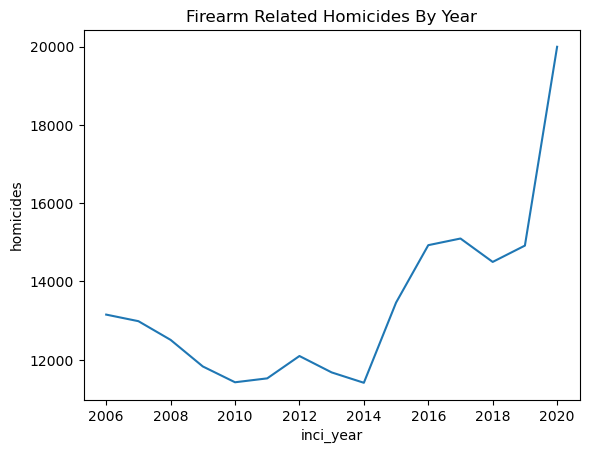

In [16]:
# Homicides by year
homicides = query_execute("SELECT inci_year, COUNT(intent) AS homicides\
               FROM gun_data\
               WHERE intent = 'Homicide'\
               GROUP BY inci_year\
               ")
columns = ['inci_year', 'homicides']
homicide_df = pd.DataFrame(homicides, columns=columns)
sns.lineplot(data=homicide_df, x='inci_year', y='homicides').set_title('Firearm Related Homicides By Year')

Text(0.5, 1.0, 'Firearm Related Suicides By Year')

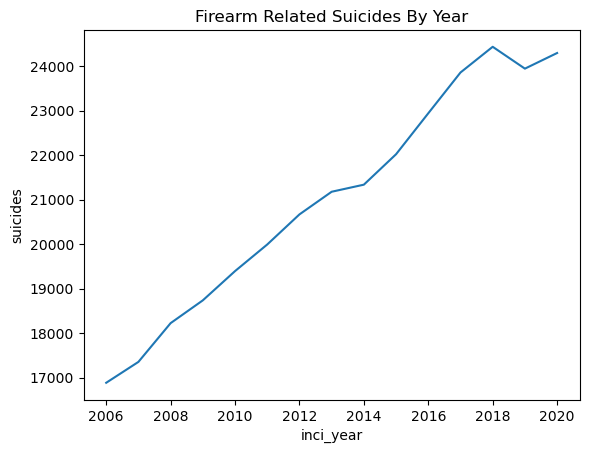

In [17]:
# Suicides by year
suicides = query_execute("SELECT inci_year, COUNT(intent) \
               FROM gun_data \
               WHERE intent = 'Suicide' \
               GROUP BY inci_year \
               ")
columns = ['inci_year', 'suicides']
suicide_df = pd.DataFrame(suicides, columns=columns)
sns.lineplot(data=suicide_df, x='inci_year', y='suicides').set_title('Firearm Related Suicides By Year')

Text(0.5, 1.0, 'Firearm Related Accidental Deaths By Year')

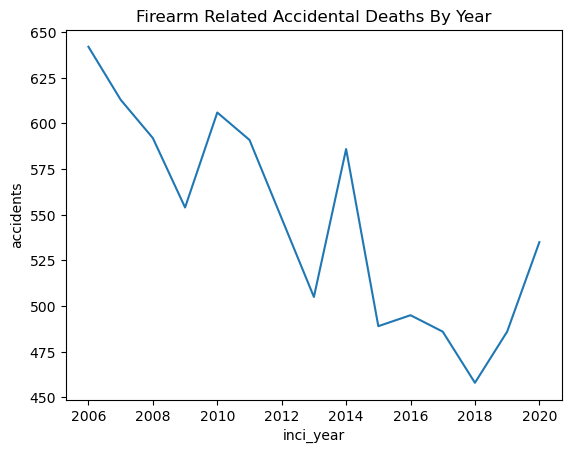

In [18]:
# Accidental deaths by year
accidents = query_execute("SELECT inci_year, COUNT(intent) \
               FROM gun_data \
               WHERE intent = 'Accidental' \
               GROUP BY inci_year \
               ORDER BY inci_year")
columns = ['inci_year', 'accidents']
accident_df = pd.DataFrame(accidents, columns=columns)
sns.lineplot(data=accident_df, x='inci_year', y='accidents').set_title('Firearm Related Accidental Deaths By Year')